# Lesson 10 Project in Python

## Import Packages

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare
from scipy.stats import chi2_contingency

## Scenario 1

In [4]:
# We have to know that 28 of the 94 claimants are not nearly as “disabled” as their diagnosis suggests, 
# and the hypothetical level of fraud is 16%.

# Will do One proportion z test

count = 28 
nobs = 94
value = .16
stats, pval = proportions_ztest(count, nobs, value)

print(stats, pval)

2.9229268377264077 0.0034675798365736213


###   ---------------------- Conclusion for Scenario 1    ---------------------- 

### Since the p-value < .05, the claimants are nearly as 'disabled' as the diagnosis suggests and level of fraud is different than 16%, and mostly less than 16%.

###   -----------------------------------------------------------------

## Scenario 2

In [ ]:
# Medical researchers are trying to understand if four topical antiseptics are being used in the same ratio 
# at three different clinics in town. 

## Load data

In [7]:
antiseptics = pd.read_csv("antiseptics.csv")
antiseptics.head()

Clinic Antiseptic Type   Number of applications
0       1                A                      22
1       1                B                      71
2       1                C                       8
3       1                D                      49
4       2                A                      38

In [8]:
# Data Wrangling - 
# 1 - Changing the namesof columns to remove spaces.

antiseptics.rename(columns={'Antiseptic Type ': "AS", "Number of applications": "Count"}, inplace=True)

In [9]:
# 2 - Creating a pivot table for testing

antiseptics_pivot = pd.pivot_table(antiseptics, index='AS', columns='Clinic', values="Count")
antiseptics_pivot

Clinic   1    2    3
AS                  
A       22   38   84
B       71  112  298
C        8   14   37
D       49   69  182

In [17]:
# Testing - We'll do Independent Chi-Square

stats.chi2_contingency(antiseptics_pivot)

(1.225920250023835,
 0.9755850789571424,
 6,
 array([[ 21.95121951,  34.09756098,  87.95121951],
        [ 73.32317073, 113.8953252 , 293.78150407],
        [  8.99390244,  13.97052846,  36.03556911],
        [ 45.73170732,  71.03658537, 183.23170732]]))

In [ ]:
# Since p-val > .05 (0.97) in this case, we can say that four topical antiseptics are being used in the same ratio 
# at all the three different clinics in town.

# Also, since each value in the array is over 5, we meet the assumptions for chi-square here.

###   ---------------------- Conclusion for Scenario 2    ---------------------- 

###  Looking at the results, we can say that the 4 topical antiseptics are being used in the same ratio at all the 3 different clinics in town.

###   ------------------------------------------------------------------ 

## Scenario 3

In [ ]:
# A financial institution is interested in the savings practices of different demographic groups.
# In order to determine savings practices, they are going to use the average savings account balance over 
# the past 3 months for their account holders. In other words, they will have one number (average account balance) 
# for each account.

### Load Data

In [28]:
savings = pd.read_csv("savings.csv")
savings.head()

Group A   Group B   Group C   Group D
0  21383.06  17077.54  13636.38  14582.73
1  19729.92  17258.06   5156.36  12880.28
2  24071.53  20652.91   4446.92  16412.72
3  19056.28  20845.06   4892.59  14020.00
4  19147.18  22296.64  14099.38  16467.70

In [29]:
# To put the groups in one column and their corresponding balance in other.

savings_expanded = pd.melt(savings,var_name='Group', value_name='AvgAccBal')

In [30]:
savings_expanded

Group  AvgAccBal
0    Group A   21383.06
1    Group A   19729.92
2    Group A   24071.53
3    Group A   19056.28
4    Group A   19147.18
..       ...        ...
227  Group D   12180.86
228  Group D   12972.11
229  Group D   12068.83
230  Group D   16064.42
231  Group D   10884.26

[232 rows x 2 columns]

In [31]:
# To convert into Numeric data instead of Categorical.

savings_expanded = savings_expanded.replace(savings.columns, [0,1,2,3])
savings_expanded.head()

Group  AvgAccBal
0      0   21383.06
1      0   19729.92
2      0   24071.53
3      0   19056.28
4      0   19147.18

### Plot Dependent Variable

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

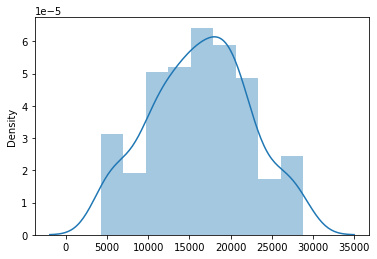

In [32]:
# To check for the Normality

sns.distplot(savings.values[~np.isnan(savings.values)])

### The graph looks pretty normal.

### Test for Homogeneity

In [38]:
# Bartlett test since it looks normal.

stats.bartlett(savings_expanded['AvgAccBal'], savings_expanded['Group'])

BartlettResult(statistic=3639.1753663764925, pvalue=0.0)

In [39]:
# Since p-val < .05,  the data above doesn't meet the Homogeneity of Variance

In [41]:
# Drop the null values

savings_expanded.dropna(inplace = True)

### Perform the One-Way ANOVA Test

In [42]:
stats.f_oneway(savings_expanded['AvgAccBal'][savings_expanded['Group'] == 0],
               savings_expanded['AvgAccBal'][savings_expanded['Group'] == 1],
               savings_expanded['AvgAccBal'][savings_expanded['Group'] == 2],
               savings_expanded['AvgAccBal'][savings_expanded['Group'] == 3],
)

F_onewayResult(statistic=203.25514198903812, pvalue=1.9933595578005075e-61)

In [ ]:
# Since the p-val > .05 (1.99 in our case), we accept the null hypothesis that The savings practices of different 
# demographic groups of account holders are pretty much the same.

###   ---------------------- Conclusion for Scenario 3    ---------------------- 

### The savings practices of different demographic groups of account holders are pretty much the same.

### --------------------------------------------------------------------

## Scenario 4

In [43]:
# The local school board conducted a poll to gauge public sentiment about a school bond. They asked respondents if 
# they favored or opposed a bond in the upcoming election.

In [44]:
# We are going to do Two proportion z test , since we have two different categorical factors here, 
# with or without children and also favoring the bond or not favoring the bond.

In [46]:
#
# With school age children and favorable - 374
# With school age children and unfavorable - 129
# Without school age children and favorable - 171
# Without school age children and unfavorable - 74


count = np.array([374,171]) # No. of favorable with or without children
nobs = np.array([374 + 129, 171 + 74])  # No. of observations, (including unfavorable too)

stats, pval = proportions_ztest(count, nobs)

print(stats, pval)

1.3156546893290748 0.18828996870412507


In [ ]:
# Since the p-val > .05, (.188) in our case,
# we can say that there's not much difference between the respondents whp favor or oppose the bond.

###   ---------------------- Conclusion for Scenario 4    ---------------------- 

### In the upcoming election, the respondents don't care much about the bond.

### ------------------------------------------------------------------------